<a href="https://colab.research.google.com/github/haishan-shi/A1/blob/master/A3_Pitch%20and%20Plan%20for%20Solving%20a%20Domain%20Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart disease prediction using Machine Learning Techniques

# AIMS 

The project aims to develop an intelligent heart disease prediction system (IHDPS) using four machine learning techniques, including KNeighbors, Decision Tree Support Vector Machine (SVM), Random Forest.
This overall aim is broken into three objectives:


*   To discover and extract hidden knowledge (patterns and relationships) related to heart disease from historical heart disease databases.  

*   To answer complex queries to diagnose heart disease and help medical practitioners make wise clinical decisions that traditional decision support systems cannot. 

*   To help to reduce the cost of treatment by providing effective treatment. 






# BACKGROUND 





The healthcare industry has collected a large amount of medical data, which unfortunately has not been explored and predicted to find hidden information for effective decision-making. The discovery of hidden patterns and relationships is often unexplored, while advanced machine learning techniques can help address this situation. In this project, an intelligent heart disease prediction system (IHDPS) was developed by using machine learning techniques including KNeighbors, Decision Tree
Support Vector Machine (SVM), Random Forest. Each algorithm has its unique strength in achieving the defined predicting objectives. IHDPS can answer complex "hypothesis" queries that traditional decision support systems cannot answer. Analysing medical dataset like age, sex, blood pressure and blood sugar based on, which can predict the possibility of heart disease. It builds important knowledge, such as patterns and relationships, between medical factors associated with heart disease(Palaniappan & Awang 2008).

# RESEARCH PROJECT 

**• Significance and solutions of the project**



Many hospital information systems are designed to support patient billing, inventory management and simple statistics generation. Some hospitals use decision support systems, but they are largely limited. They can answer simple questions like "What's the average age of a heart patient?" "How many operations lead to hospitalization lasting more than 10 days?" However, they could not answer complex questions, such as "identifying important preoperative predictors to increase hospital stay" and "considering the records of cancer patients, treatment should include separate chemotherapy and radiotherapy. One person, or chemotherapy and radiotherapy? And "Given patient records, predict the likelihood of a patient suffering from heart disease." Clinical decision-making is usually based on the doctor's intuition and experience, rather than the knowledge-rich data hidden in the database. This practice leads to unnecessary prejudices, errors and excessive medical costs, affecting the quality of services provided to patients. Wu et al. proposed that the combination of clinical decision support and computer-based patient records could reduce medical errors, improve patient safety, reduce unnecessary changes in practice and improve patient outcomes. This suggestion is promising because data modeling and analysis tools, such as data mining, may create a knowledge-rich environment that can significantly improve the quality of clinical decision-making(Palaniappan & Awang 2008).





** **
**• Innovation behind the project**


Multi-label classification of text data is a considerable challenge in the real-world data. When we deal with early machine learning problems, we usually work on single-label tasks. In the real-world data, there are several gaps in the level, which enable us to quickly implement the hierarchical multi-label classification task of the algorithms. What I am interested in machine learning is that it provides a wide variety of data prediction.


**• Outline for addressing the problem**

IHDPS uses four classifiers algorithms to construct models, which includes four main steps: data understanding, data preparation, modelling and evaluation. The data understanding stage uses raw data and understands it, identifies its quality, gains initial insight, and detects interesting subsets to form hypotheses of implicit information. In the data preparation stage, the final data set is constructed and input into the modelling technique, which includes table, record and attribute selection, as well as data partitioning and transformation. In the modelling stage, various classifiers are selected and applied, and their parameters are calibrated to the optimal value. The evaluation phase analyses the classifiers to ensure that it achieves business objectives. 

** **
**Breakdown of the tasks:**

**(i)	Build Classifiers using Python+some libraries**


In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**(ii)	Construct Training Set**

In [0]:
#load data 
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "heart.csv" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "heart.csv" with length 38114 bytes


In [0]:
heart = pd.read_csv('heart.csv')

In [0]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


To deal with classification variables, it needs decompose each classification column into dummy columns with 1s and 0s. Suppose we have a "sex" column with a male value of 1 and a female value of 0. It needs to be converted to two columns, with a value of 1, a value of true, a value of 0, and a value of false. Example shown as below.

In [0]:
# Original Columm
# |    sex   |
# |     1    |
# |     1    |
# |     0    |

# Dummy Columns
# |    sex_0   ||    sex_1   |
# |      0     ||      1     |
# |      0     ||      1     |
# |      1     ||      0     |

heart = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart[columns_to_scale] = standardScaler.fit_transform(heart[columns_to_scale])

In [0]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


**** 
**(iii)	Evaluation**

In [0]:
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.65, random_state = 0)

In [0]:
knn_scores = []
for k in range(1,31):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

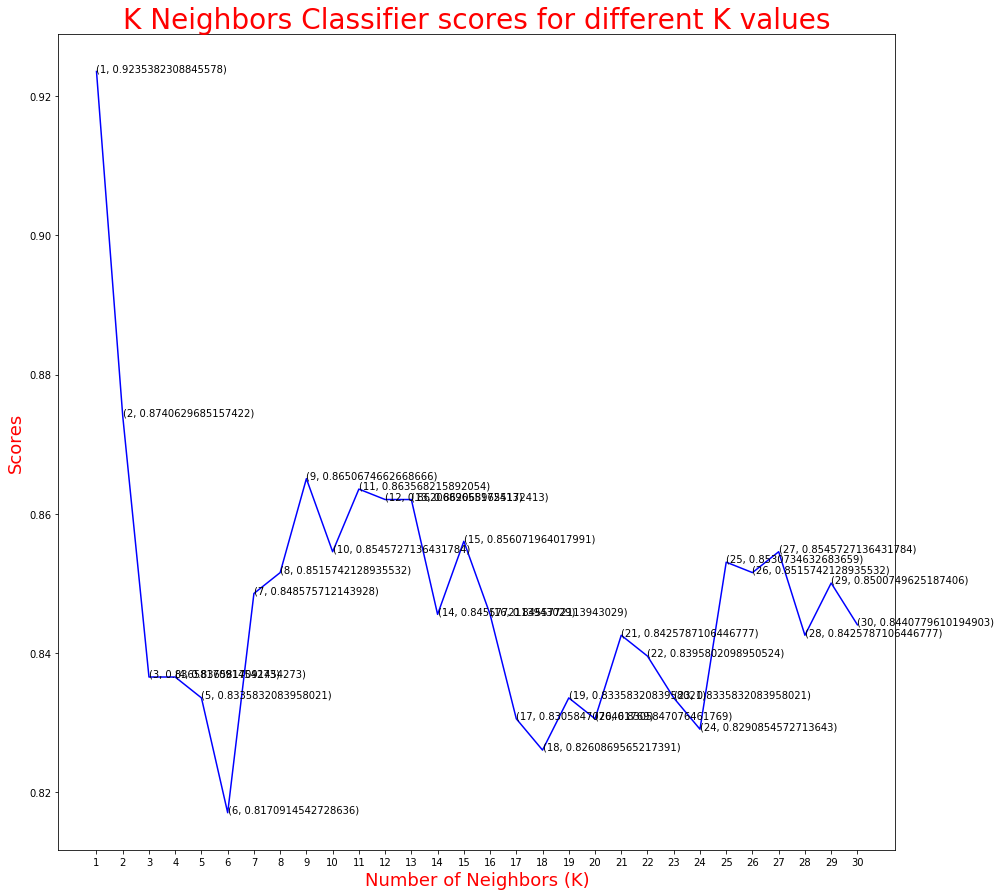

In [0]:
rcParams['figure.figsize'] = 15, 15
plt.plot([k for k in range(1, 31)], knn_scores, color = 'blue')
for i in range(1,31):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 31)])
plt.xlabel('Number of Neighbors (K)', color = 'red', fontsize=18)
plt.ylabel('Scores', color = 'red', fontsize=18)
plt.title('K Neighbors Classifier scores for different K values', color = 'red',fontsize=28)

In [0]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

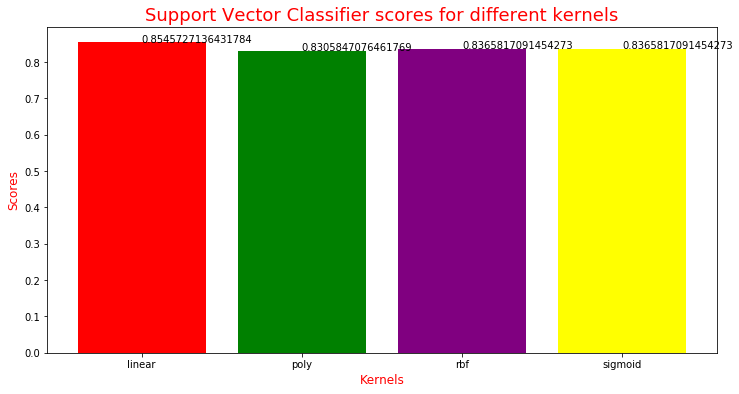

In [0]:
rcParams['figure.figsize'] = 12, 6
plt.bar(kernels, svc_scores, color = ['red', 'green', 'purple', 'yellow'])
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels', color = 'red', fontsize=12)
plt.ylabel('Scores', color = 'red', fontsize=12)
plt.title('Support Vector Classifier scores for different kernels', color = 'red', fontsize=18)

In [0]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

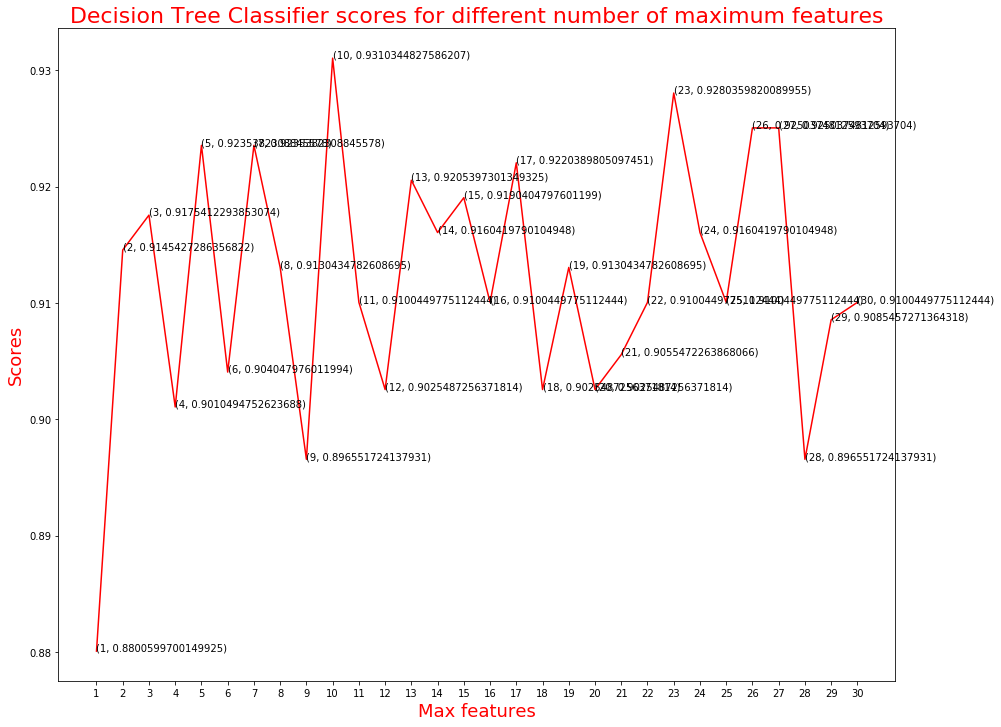

In [0]:
rcParams['figure.figsize'] = 15, 12
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'red')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features', color = 'red', fontsize=18)
plt.ylabel('Scores', color = 'red', fontsize=18)
plt.title('Decision Tree Classifier scores for different number of maximum features', color = 'red', fontsize=22)

In [0]:
rf_scores = []
estimators = [10, 50, 150, 300, 500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

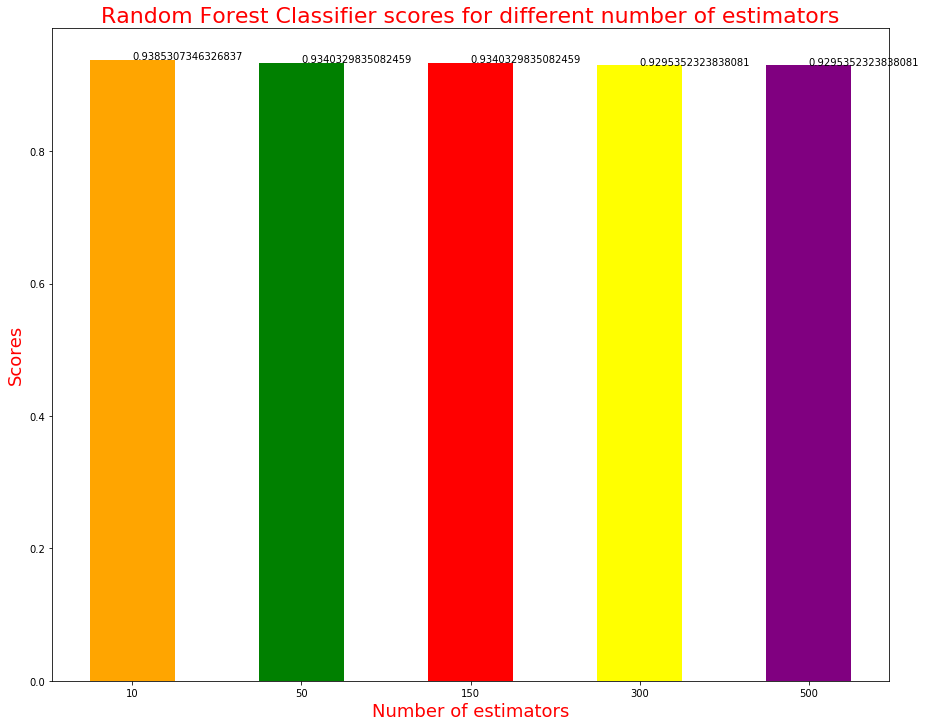

In [0]:
rcParams['figure.figsize'] = 15, 12
plt.bar([i for i in range(len(estimators))], rf_scores, color = ['orange', 'green', 'red', 'yellow', 'purple'], width = 0.5)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators', color = 'red', fontsize=18)
plt.ylabel('Scores', color = 'red', fontsize=18)
plt.title('Random Forest Classifier scores for different number of estimators', color = 'red', fontsize=22)

The results show that the four models have achieved the expected goal, which suggests that they can provide decision support for doctors to diagnose and discover medical factors related to heart disease. According to the patient's medical condition, patients who may be diagnosed with heart disease are predicted. All three models can answer this question with single query and batch or predictive join query. Both queries can predict single input case and multiple input cases respectively. Ihdps supports the use of "hypothesis" scenarios for prediction. Users enter medical attribute values to diagnose heart disease patients.It is shown that Random Forest Classifier is the best score of 93.85% for 10 trees. However, K Neighbors Classifier and Decision Tree Classifier are also higher accuracy of 92.35% with 1 neightbour and 93.1% with 10 features.